Import data and libraries

In [40]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

df = pd.read_csv("StateNames.csv") 


Check data layout, to see if it is tidy

In [2]:
df.head(10)

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


Rows correspond to idividuals and columns to variables, the data looks tidy

First task is to find which name was the most popular in each state before and after 1990 year;
First I will split the data before and after 1990


In [50]:
df_before_1990 = df[df["Year"] < 1990]
df_after_1990 = df[df["Year"] >= 1990]

Here I grouped all the data by Name and State, and summed the Count column for each group, after sorting by summed values the top values for each state are returned 

In [51]:
group_before_1990 = df_before_1990.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})
sorted_before_1990 = group_before_1990.sort_values(by=['Count'],ascending=False)
sorted_before_1990.groupby("State", as_index=False).first()

,State,Name,Count
0,AK,Michael,6158
1,AL,James,145941
2,AR,James,79777
3,AZ,Michael,30467
4,CA,Michael,330286
5,CO,Robert,43212
6,CT,John,72322
7,DC,John,31804
8,DE,John,13308
9,FL,James,114218


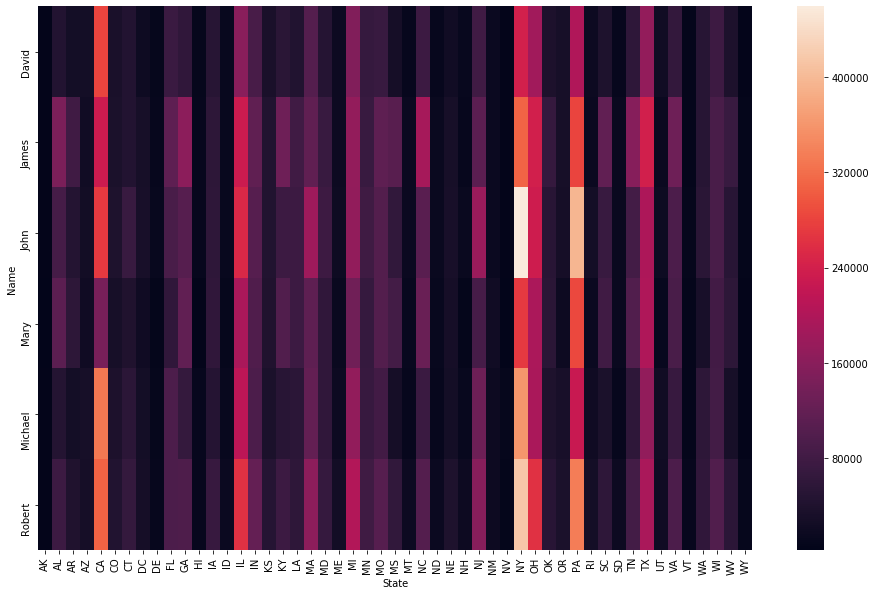

In [48]:
top_names_before_1990 = sorted_before_1990.groupby("State", as_index=False).first()["Name"].unique()
top_names_before_1990_subset = group_before_1990[group_before_1990.Name.isin(top_names_before_1990)]
top_names_before_1990_subset = top_names_before_1990_subset.pivot("Name", "State", "Count")
plt.figure(figsize=(16, 10))

sns.heatmap(top_names_before_1990_subset)

In [52]:
group_after_1990 = df_after_1990.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})
sorted_after_1990 = group_after_1990.sort_values(by=['Count'],ascending=False)
sorted_after_1990.groupby("State", as_index=False).first()

,State,Name,Count
0,AK,Michael,1916
1,AL,William,14629
2,AR,Jacob,6513
3,AZ,Michael,14456
4,CA,Daniel,103620
5,CO,Michael,10313
6,CT,Michael,12964
7,DC,Michael,3009
8,DE,Michael,2816
9,FL,Michael,45245


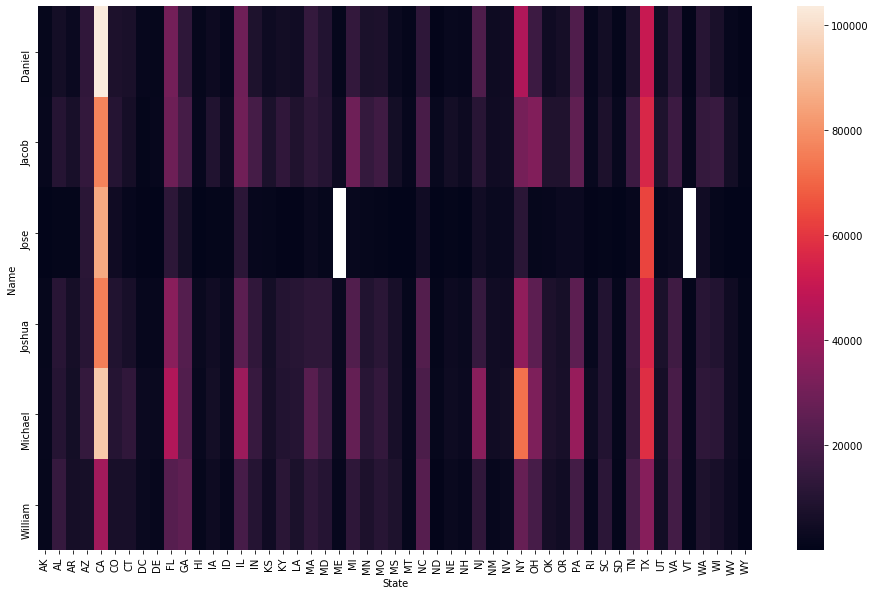

In [53]:
top_names_after_1990 = sorted_after_1990.groupby("State", as_index=False).first()["Name"].unique()
top_names_after_1990_subset = group_after_1990[group_after_1990.Name.isin(top_names_after_1990)]
top_names_after_1990_subset = top_names_after_1990_subset.pivot("Name", "State", "Count")
plt.figure(figsize=(16, 10))

sns.heatmap(top_names_after_1990_subset)

Second task: which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you

In [4]:
is_year_between_1990_2000 = (df["Year"] > 1990) & (df["Year"] < 2000)
selected_states = ["CA", "TX", "NY"]
is_f = df["Gender"] == "F"
is_m = df["Gender"] == "M"
selected_states_df = df[is_year_between_1990_2000][df.State.isin(selected_states)]
m_1990_2000 = selected_states_df[is_m]
f_1990_2000 = selected_states_df[is_f]

/home/aleksandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/aleksandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aleksandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [32]:
m_1990_2000_group = m_1990_2000.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})

sorted_m_1990_2000 = m_1990_2000_group.sort_values(by=['Count'],ascending=False)
top_3_1990_2000_m = sorted_m_1990_2000.groupby(["State"]).nth([0,1,2])
top_3_1990_2000_m

,Name,Count
State,,
CA,Michael,46489
CA,Daniel,44005
CA,Jose,41395
NY,Michael,37138
NY,Christopher,25755
NY,Matthew,25375
TX,Michael,26469
TX,Christopher,25528
TX,Jose,24928


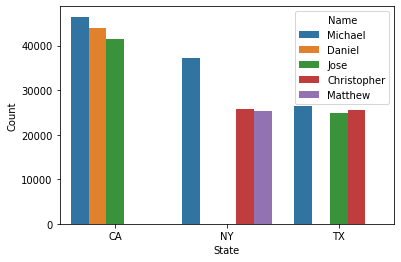

In [33]:
ax = sns.barplot(x="State", y="Count", hue="Name", data = top_3_1990_2000_m.reset_index())

In [35]:
f_1990_2000_group = f_1990_2000.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})

sorted_f_1990_2000 = f_1990_2000_group.sort_values(by=['Count'],ascending=False)
top_3_1990_2000_f = sorted_f_1990_2000.groupby(["State"]).nth([0,1,2])
top_3_1990_2000_f

,Name,Count
State,,
CA,Jessica,41175
CA,Ashley,28551
CA,Jennifer,26174
NY,Ashley,18195
NY,Samantha,16797
NY,Jessica,16736
TX,Ashley,22009
TX,Jessica,19609
TX,Sarah,14694


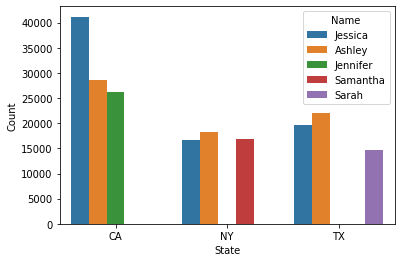

In [36]:
ax = sns.barplot(x="State", y="Count", hue="Name", data = top_3_1990_2000_f.reset_index())

Third task: dynamics of three names selected by you in those three states starting from 1990 year.


In [62]:
selected_names = ["Alexander", "Mary", "John"]
selected_names_df = df[df.Name.isin(selected_names) & df.State.isin(selected_states)]
selected_names_df_after_1990 = selected_names_df[selected_names_df["Year"] >= 1990]

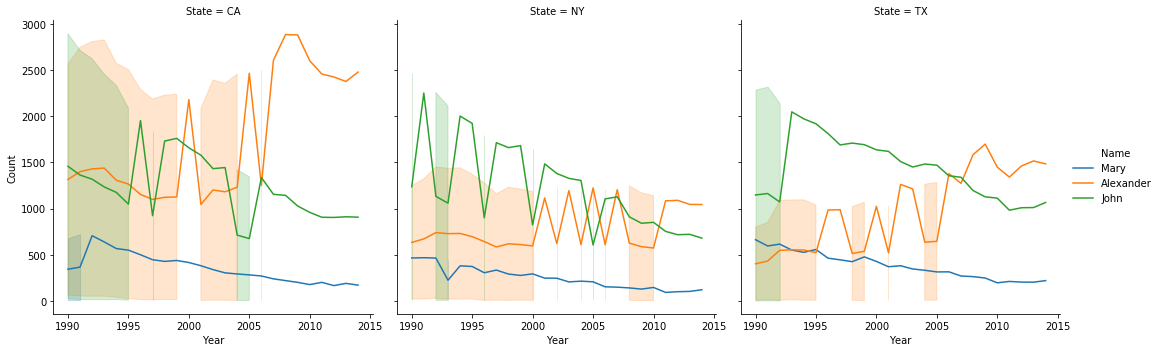

In [78]:

sns.relplot(x="Year", y="Count",
            hue="Name", col="State",
            kind="line", data=selected_names_df_after_1990)